<a href="https://colab.research.google.com/github/rhks13/Vision_practice/blob/main/%EB%8F%84%EB%B0%B0%EC%9D%B4%EB%AF%B8%EC%A7%80_%ED%99%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

In [3]:
from PIL import Image
from tqdm import tqdm
import random
import cv2

In [4]:
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name][:10]

['NanumGothic',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare']

In [5]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [111]:
base_dir = "/content/drive/MyDrive/캐글&데이콘/데이콘 - 도배하자/data/"
train_folder = glob(base_dir + 'train/*')
train_path = []

for folder in train_folder:
  tmp = glob(folder + '/*')
  train_path += tmp

In [112]:
len(train_path)

3457

In [116]:
train_df = pd.DataFrame(train_path, columns = ['path'])
train_df['label']=train_df['path'].apply(lambda x :x.split('/')[-2])
train_df

,path,label
0,/content/drive/MyDrive/캐글&데이콘/데이콘 -...,면불량
1,/content/drive/MyDrive/캐글&데이콘/데이콘 -...,면불량
2,/content/drive/MyDrive/캐글&데이콘/데이콘 -...,면불량
3,/content/drive/MyDrive/캐글&데이콘/데이콘 -...,면불량
4,/content/drive/MyDrive/캐글&데이콘/데이콘 -...,면불량
...,...,...
3452,/content/drive/MyDrive/캐글&데이콘/데이콘 -...,피스
3453,/content/drive/MyDrive/캐글&데이콘/데이콘 -...,피스
3454,/content/drive/MyDrive/캐글&데이콘/데이콘 -...,피스
3455,/content/drive/MyDrive/캐글&데이콘/데이콘 -...,피스


In [117]:
train_df['label'][0][0]

'ᄆ'

In [118]:
[train_df['label'][0][i] for i in range(len(train_df['label'][0]))]

['ᄆ', 'ᅧ', 'ᆫ', 'ᄇ', 'ᅮ', 'ᆯ', 'ᄅ', 'ᅣ', 'ᆼ']

In [119]:
import unicodedata
def trans(x):
  return unicodedata.normalize('NFC',x)

In [120]:
train_df.loc[:,'label']=train_df['label'].apply(trans)

In [121]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [122]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'NanumGothic'

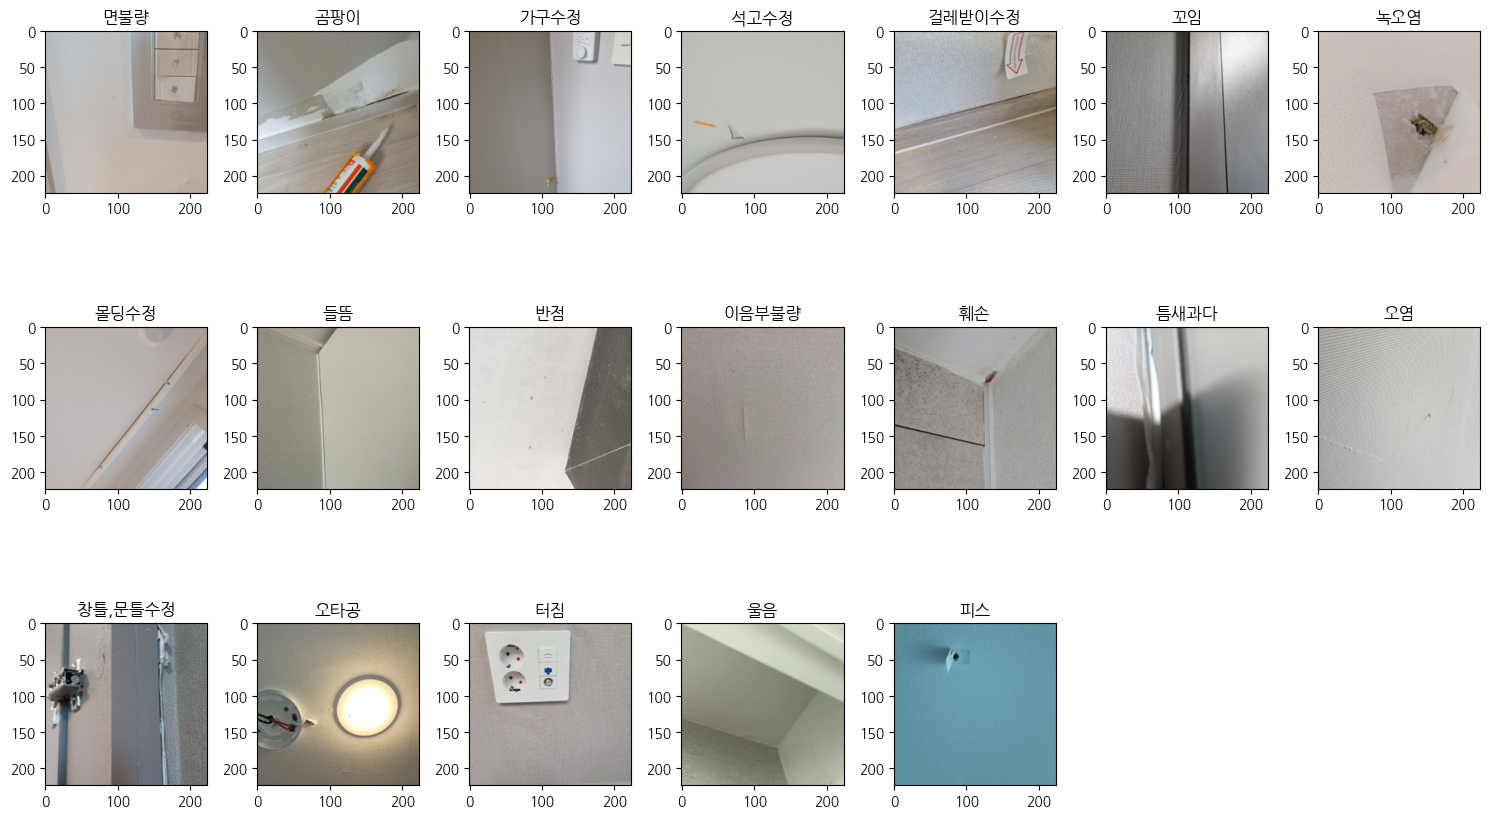

In [130]:
plt.figure(figsize = (15,12))
for idx, i in enumerate(train_df.label.unique()):
    plt.subplot(4, 7, idx+1)
    
    df = train_df[train_df['label'] == i].reset_index(drop = True)
    image_path = df.loc[random.randint(0, len(df)-1), 'path']
    img = Image.open(image_path)
    img = img.resize((224,224))
    plt.imshow(img)
    plt.title(i)
plt.tight_layout()
plt.show()

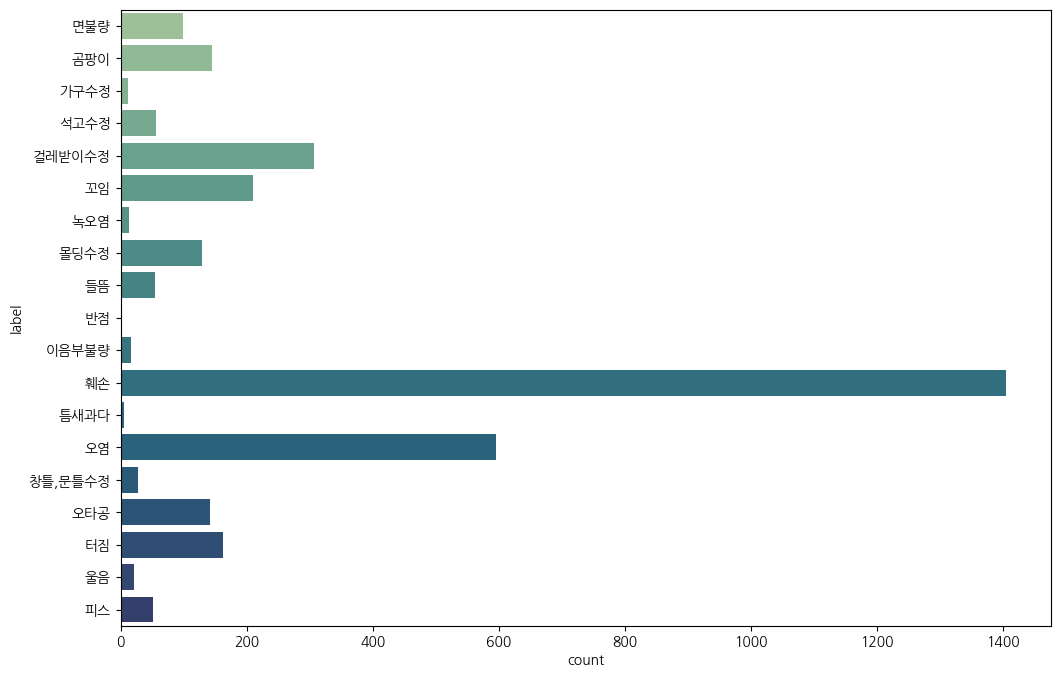

In [125]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=train_df, y='label',  palette='crest', dodge=False)
plt.show()

In [127]:
train_df['label'].value_counts()

훼손         1405
오염          595
걸레받이수정      307
꼬임          210
터짐          162
곰팡이         145
오타공         142
몰딩수정        130
면불량          99
석고수정         57
들뜸           54
피스           51
창틀,문틀수정      27
울음           22
이음부불량        17
녹오염          14
가구수정         12
틈새과다          5
반점            3
Name: label, dtype: int64